# Исследование продаж игр интернет-магазина "Cтримчик"

**Описание компании:** Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель:** Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release— год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
    ESRB:
    'E' - «Для всех»
    'M' - «Для взрослых»
    'T' - «Подросткам»
    'E10+' - «Для всех от 10 лет и старше»
    'K-A' -  «Для детей и взрослых»
    'AO' - «Только для взрослых»
    'EC' - «Для детей младшего возраста»
    'RP' - «Рейтинг ожидается»

# 1. Откроем файл с данными и изучим общую информацию

### Импортируем нужные библиотеки

In [1]:
# импортируем нужные библиотеки
from scipy import stats as st

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Через конструкцию try-except прочтем файл и сохраним ее в переменную df

In [2]:
# Через конструкцию try-except прочтем файл и сохраним ее в переменную df
try:
    df = pd.read_csv(r"F:\1-AFTER\5. Сборный проект 1\games.csv")  # , sep='\t'
except FileNotFoundError:
    print("FileNotFoundError: Проверьте корректность пути или наличие самого файла в указанной директории")

### Выведем первые 5 строк

In [3]:
# Выведем первые 5 строк
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Выведем информацию об признаках, кол-ве ненулевых значений и типах данных

In [4]:
# Выведем информацию об признаках, кол-ве ненулевых значений и типах данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Визуализируем признаки, чтобы увидеть и проанализировать потенциальные особенности

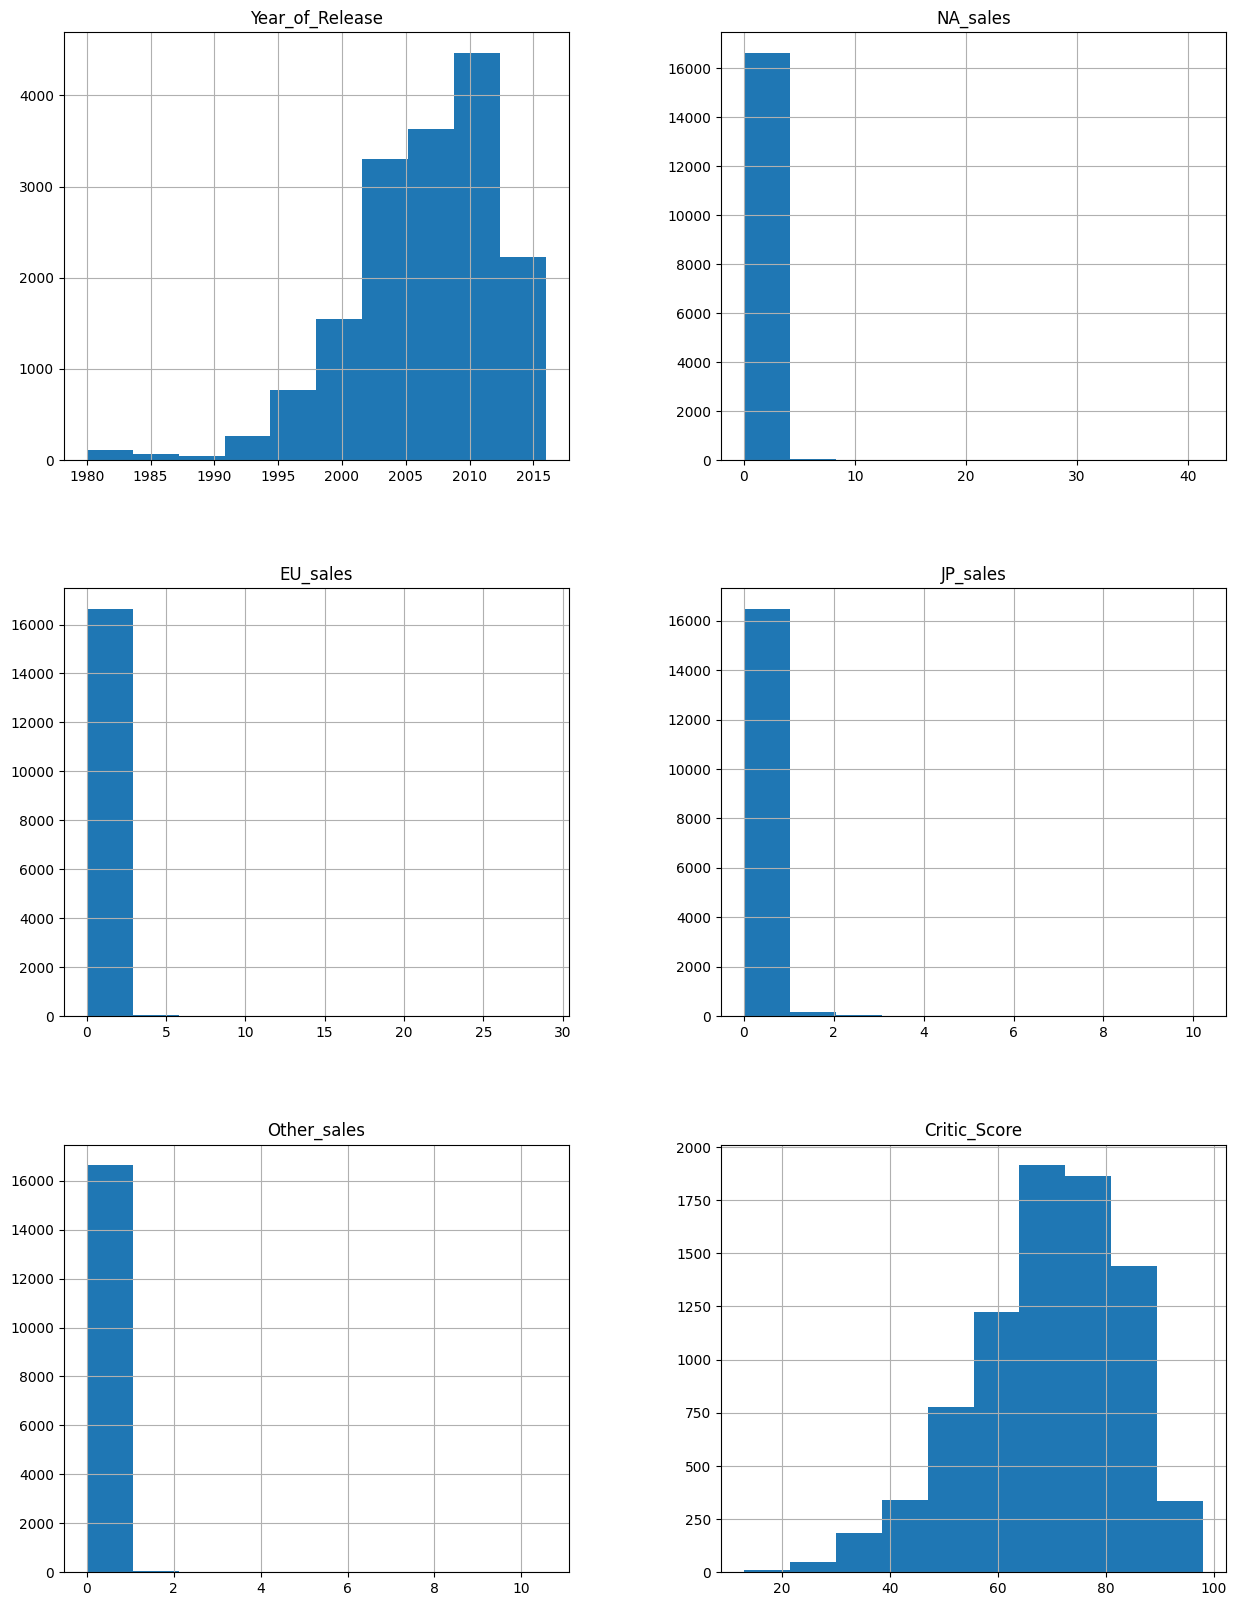

In [5]:
# Визуализируем признаки, чтобы увидеть и проанализировать потенциальные особенности

df.hist(figsize=(15,20)) # зададим размерность
plt.show()

### Проверим количество пропусков по признакам

In [6]:
# Проверим количество пропусков по признакам
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Проверим количество явных дубликатов

In [7]:
# Проверим количество дубликатов
for x in df.columns:
    print("Кол-во дубликтов для столбца", x, "равняется", df[x].duplicated().sum())

Кол-во дубликтов для столбца Name равняется 5155
Кол-во дубликтов для столбца Platform равняется 16684
Кол-во дубликтов для столбца Year_of_Release равняется 16677
Кол-во дубликтов для столбца Genre равняется 16702
Кол-во дубликтов для столбца NA_sales равняется 16313
Кол-во дубликтов для столбца EU_sales равняется 16408
Кол-во дубликтов для столбца JP_sales равняется 16471
Кол-во дубликтов для столбца Other_sales равняется 16560
Кол-во дубликтов для столбца Critic_Score равняется 16632
Кол-во дубликтов для столбца User_Score равняется 16618
Кол-во дубликтов для столбца Rating равняется 16706


## Выводы:

1. Видим, что для данного датафрейма есть пропуски в определенных столбцах
2. Названия столбцов не совсем правильно оформленны 
3. Тип данных для некоторых столбцов некоректен, - это говорит нам о том, что это следует исправить. 

Возможными причинами пропусков является либо ошибка при считывании данных, либо же для определенных данных нечего было добавить, к примеру, рейтинг критиков для данной игры не обнаружился

# 2. Предобработка данных

### Приведем к коректному формату названия наших признаков (столбцов)

In [8]:
# Приведем к коректному формату названия наших признаков (столбцов)
df.columns = df.columns.str.lower()

По правилам правильного оформления, названия столбцов должны быть с нижним и змеинным регистром. Потому следует исправить момент с верхним регистром

### Проведем обработку пропусков

In [9]:
# Помним: NaN нам не мешают при построении графиков и расчете корреляции
df = df.dropna(subset=['year_of_release'])

In [10]:
df['user_score'] = df['user_score'].replace('tbd', 'NaN')

In [11]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float64')

### Так как признак количественный, то заглушку корректно сделать такую же - числовую

In [12]:
# заглушку корректно сделать такую же - числовую
df['user_score'] = df['user_score'].fillna(-1)

### Так как признак категориальный, то заглушку корректно сделать такую же - категариальную

In [13]:
# заглушку корректно сделать такую же - категариальную
df['rating'] = df['rating'].fillna('-1')

### Так как количетсво пропусков всего два в 'genre' и 'name' - то проще просто их удалить

In [14]:
df = df.dropna(subset=['genre'])

In [15]:
df = df.dropna(subset=['name'])

In [16]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score            0
rating                0
dtype: int64

### Добавим новый признак для большей информативности о том, сколько составляют глобальные продажи

In [17]:
# Добавим новый признак
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Выводы по пропускам и типах данных:

1. Понимаем, что для того чтобы изменить тип даных следует в начале избавится от пропусков. 
2. Тип данных для 'year_of_release' у нас float64, что некоретно, год должен быть целочисленным. 
3. Тип данных для 'user_score' у нас object, а должен быть float64, так как число не должно быть строкой
4. Тип данных для 'critic_score' у нас float64, а должны быть целочисленные, поскольку видны количественные оценки без остатка
5. Далее, по ходу преобразования обнаружили, что в 'user_score' хранится как оценки типа float, так и строки (object).

6. Строку tba - To Be Annonced - можно заменить на пустоту 'NaN'  или другое необычное значение, которое может хранится в типе float. Тогда это ошибка исчезнет при переводе типа. Приводим к ее корретному типу - float64 и после заменяем все пропуски на медиану

****

# 3. Проведите исследовательский анализ данных

### Взглянем на обновленные графики данных:

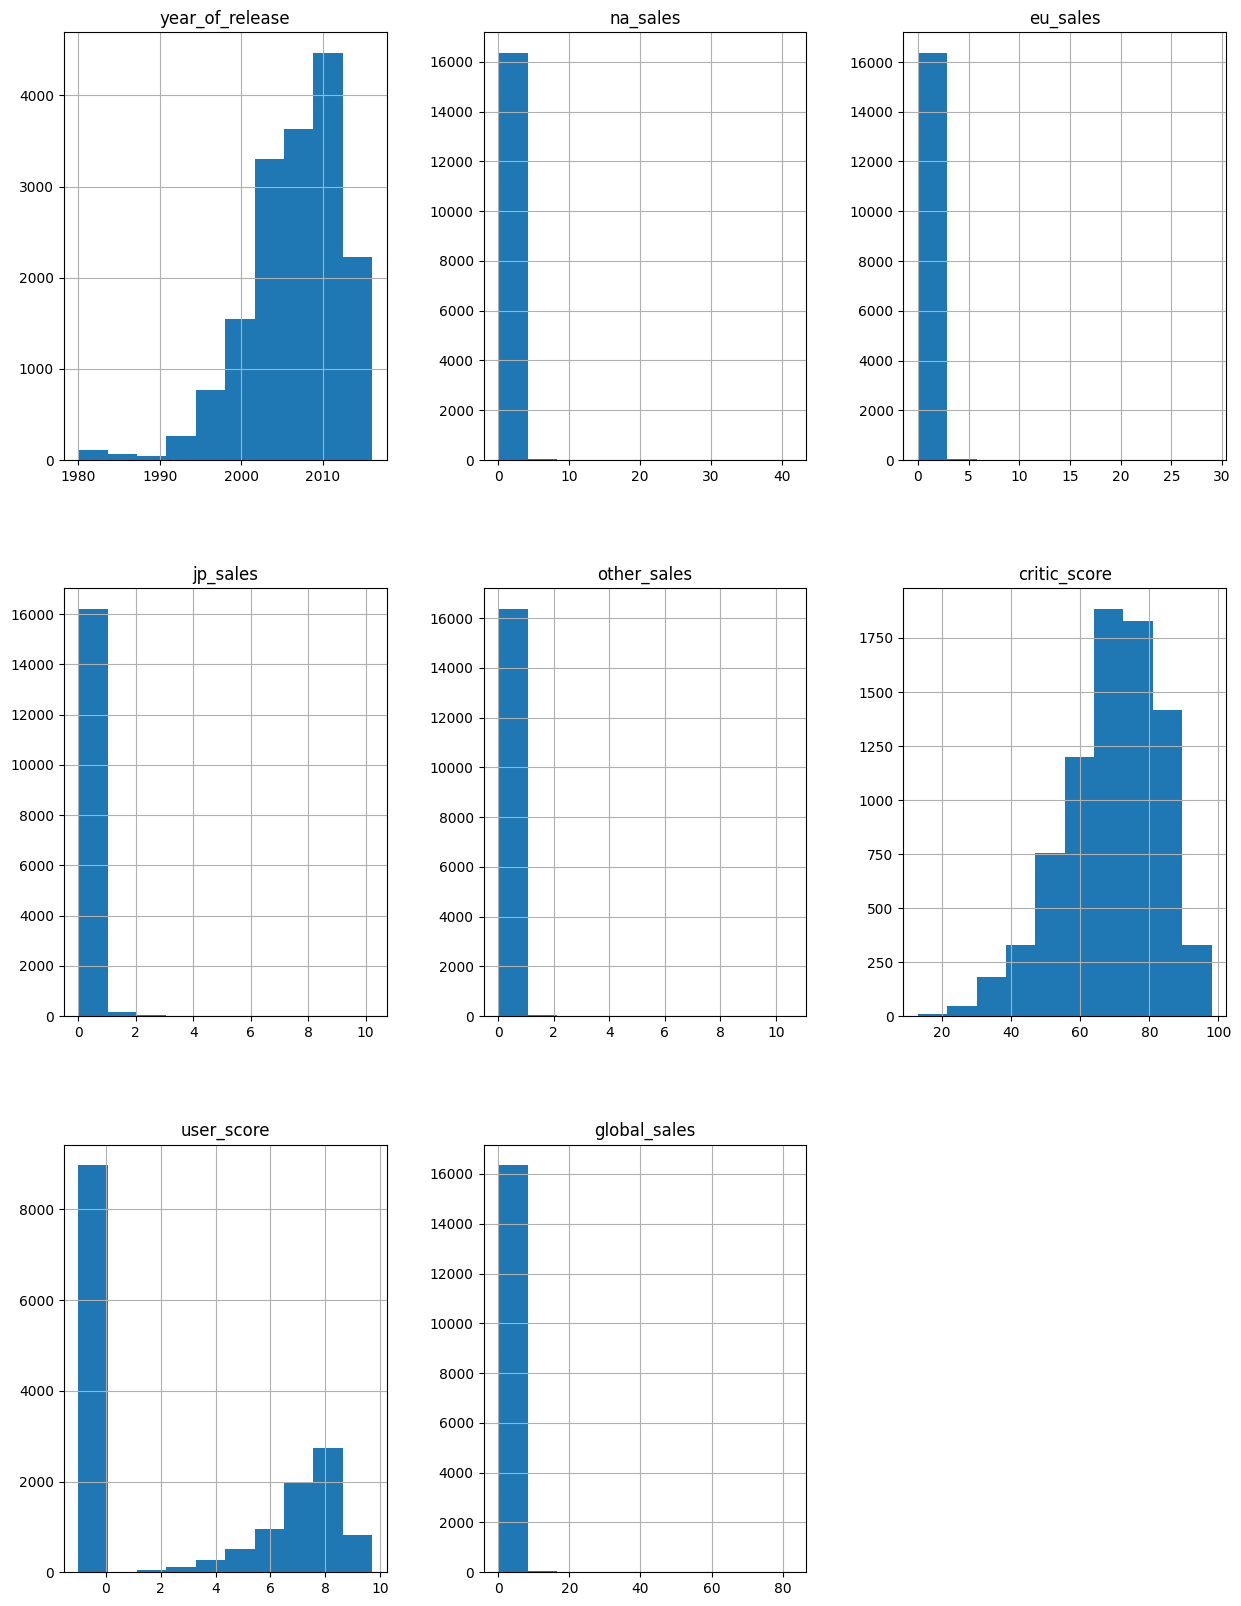

In [18]:
# Взглянем на обновленные графики данных
df.hist(figsize=(15,20))
plt.show()

### Для того чтобы можно было произвести визуализацию и просумировать, следует указать новый признак равный 1

In [19]:
# новый признак - 'game_release'
df['game_release'] = 1

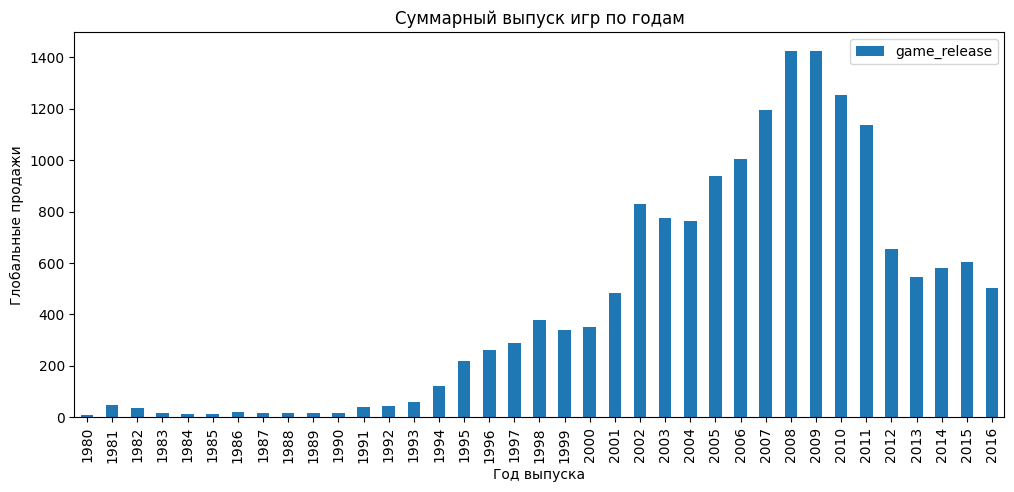

In [20]:
df.pivot_table(index='year_of_release', values='game_release', aggfunc='sum').plot.bar(figsize=(12, 5), \
                                                                                       ylabel="Глобальные продажи", \
                                                                                       xlabel="Год выпуска", \
                                                                                       title='Суммарный выпуск игр по годам')
plt.show()

## Выводы по графику:

Судя по графику, мы наблюдаем что начиная с 1996 года и последующие годы выпускать игры стали все больше и исходя из этого, - интерес к играм стал возрастать все больше, но начиная с 2007 года игр становилось все меньше по выпуску. 

Потому отсюда можно сказать, что **нам не важны данные за все периоды**, а только те, которые показывают явную значимость для анализа

****

# Просмотрим топ 10 игр по прибыльности на платформах

In [21]:
print(df.groupby('platform')['global_sales'].sum().sort_values(ascending=False).head(10))
print("Цифровое обозначение: миллионы проданных копий")

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: global_sales, dtype: float64
Цифровое обозначение: миллионы проданных копий


## Произведем последовательную визулизацию наших данных

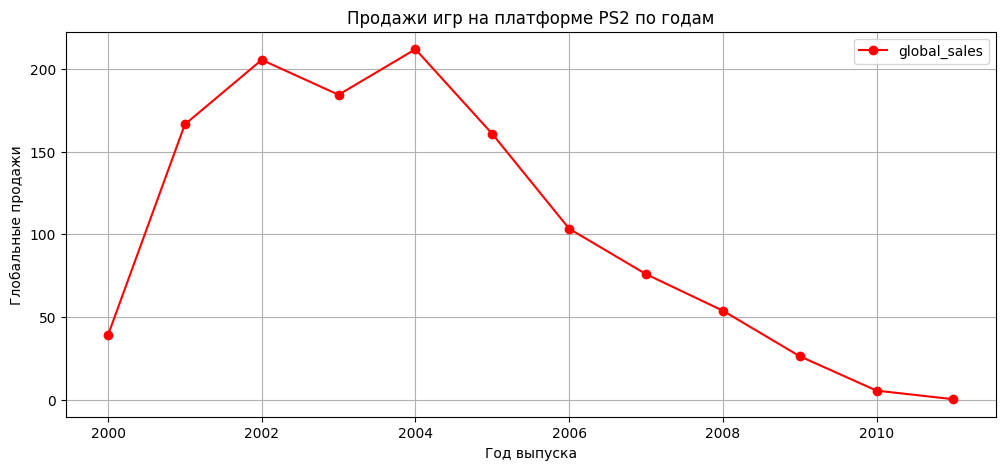

In [22]:
df.query('platform == "PS2"')\
.pivot_table(index='year_of_release', values='global_sales', aggfunc='sum')\
.plot(grid=True, 
      style='o-', 
      figsize=(12, 5), 
      color='r', 
      ylabel="Глобальные продажи", 
      xlabel="Год выпуска",
      title='Продажи игр на платформе PS2 по годам')
plt.show()

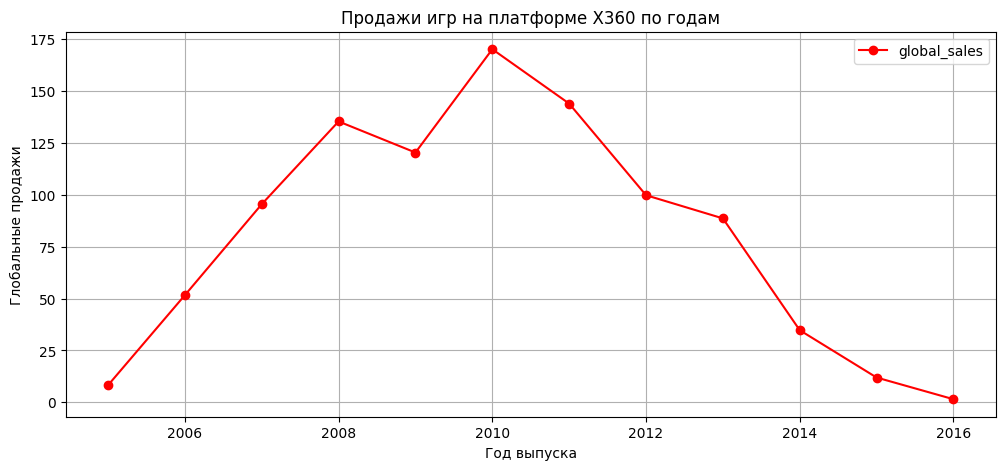

In [23]:
df.query('platform == "X360"')\
.pivot_table(index='year_of_release', values='global_sales', aggfunc='sum')\
.plot(grid=True, 
      style='o-', 
      figsize=(12, 5), 
      color='r', 
      ylabel="Глобальные продажи",
      xlabel="Год выпуска",
      title='Продажи игр на платформе X360 по годам')
plt.show()

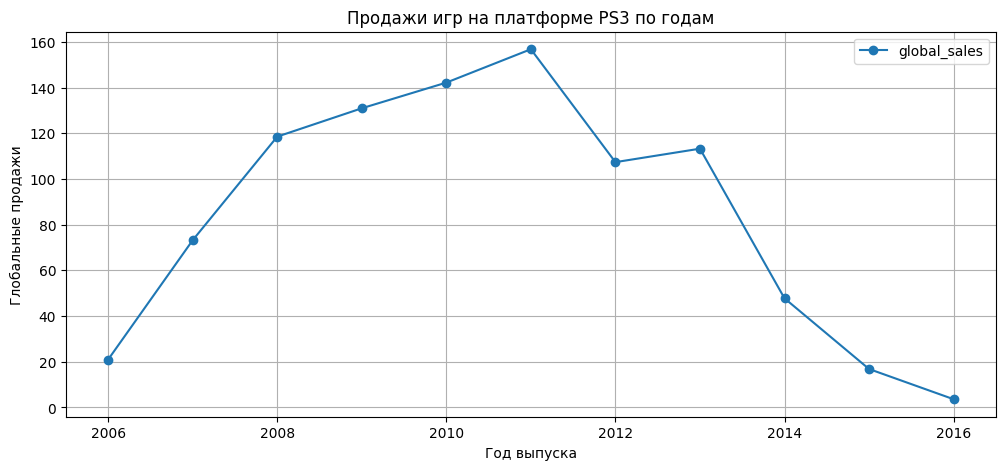

In [24]:
df.query('platform == "PS3"')\
.pivot_table(index='year_of_release', values='global_sales', aggfunc='sum')\
.plot(grid=True, 
      style='o-', 
      figsize=(12, 5), 
      ylabel="Глобальные продажи",
      xlabel="Год выпуска",
      title='Продажи игр на платформе PS3 по годам')
plt.show()

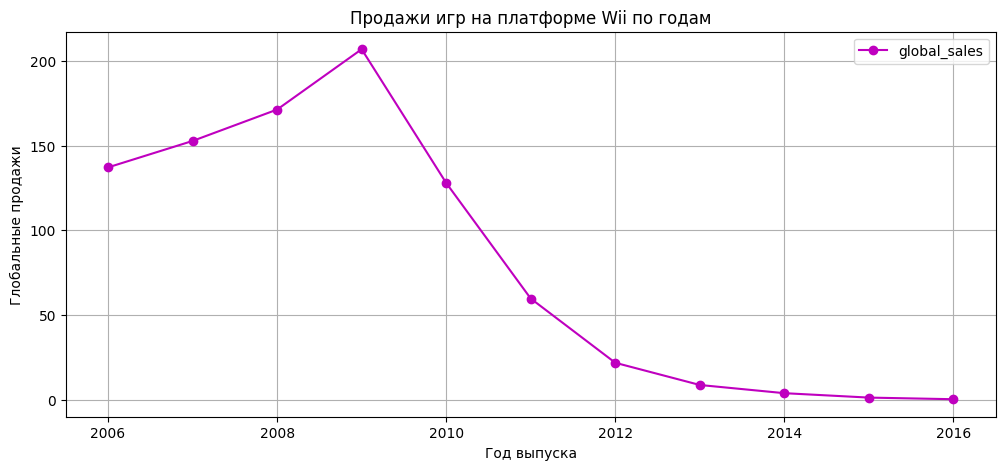

In [25]:
df.query('platform == "Wii"')\
.pivot_table(index='year_of_release', values='global_sales', aggfunc='sum')\
.plot(grid=True, 
      style='o-', 
      figsize=(12, 5), 
      color='m', 
      ylabel="Глобальные продажи", 
      xlabel="Год выпуска",
      title='Продажи игр на платформе Wii по годам')
plt.show()

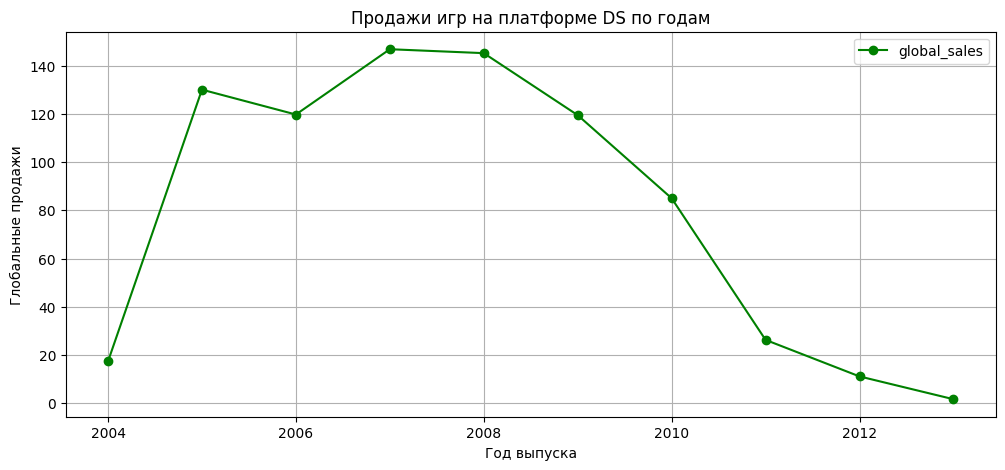

In [26]:
df1 = df.copy()
df1.query('platform == "DS" and year_of_release >= 2004')\
.pivot_table(index='year_of_release', values='global_sales', aggfunc='sum')\
.plot(grid=True, 
      style='o-', 
      figsize=(12, 5), 
      color='g', 
      ylabel="Глобальные продажи", 
      xlabel="Год выпуска",
      title='Продажи игр на платформе DS по годам')
plt.show()

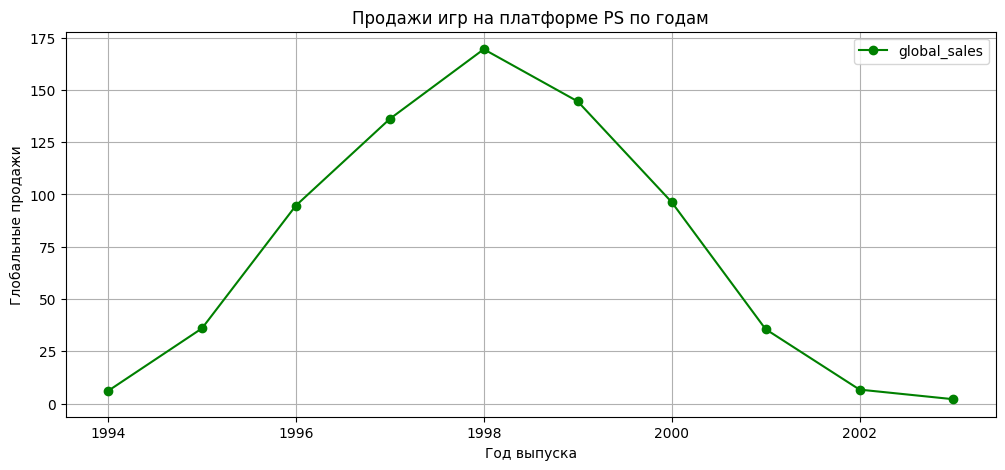

In [27]:
df.query('platform == "PS"')\
.pivot_table(index='year_of_release', values='global_sales', aggfunc='sum')\
.plot(grid=True, 
      style='o-', 
      figsize=(12, 5), 
      color='g', 
      ylabel="Глобальные продажи", 
      xlabel="Год выпуска",
      title='Продажи игр на платформе PS по годам')
plt.show()

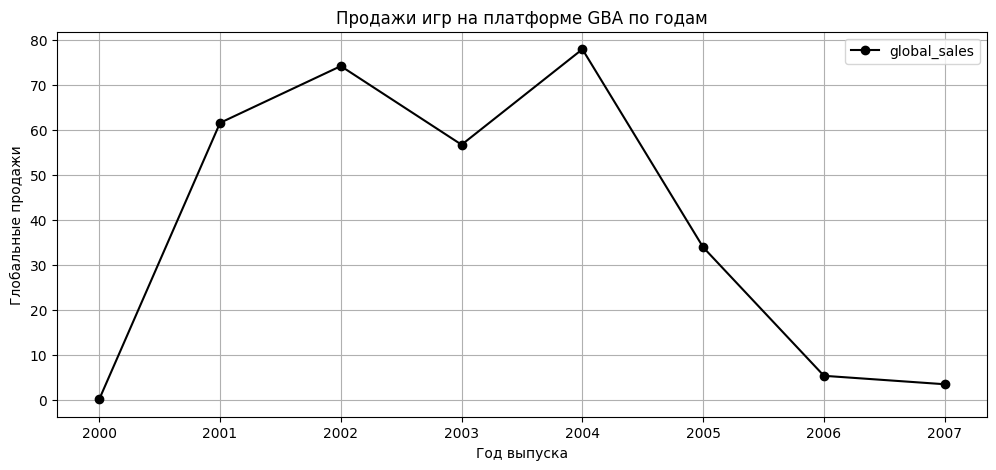

In [28]:
df.query('platform == "GBA"')\
.pivot_table(index='year_of_release', values='global_sales', aggfunc='sum')\
.plot(grid=True, 
      style='o-', 
      figsize=(12, 5), 
      color='k', 
      ylabel="Глобальные продажи", 
      xlabel="Год выпуска",
      title='Продажи игр на платформе GBA по годам')
plt.show()

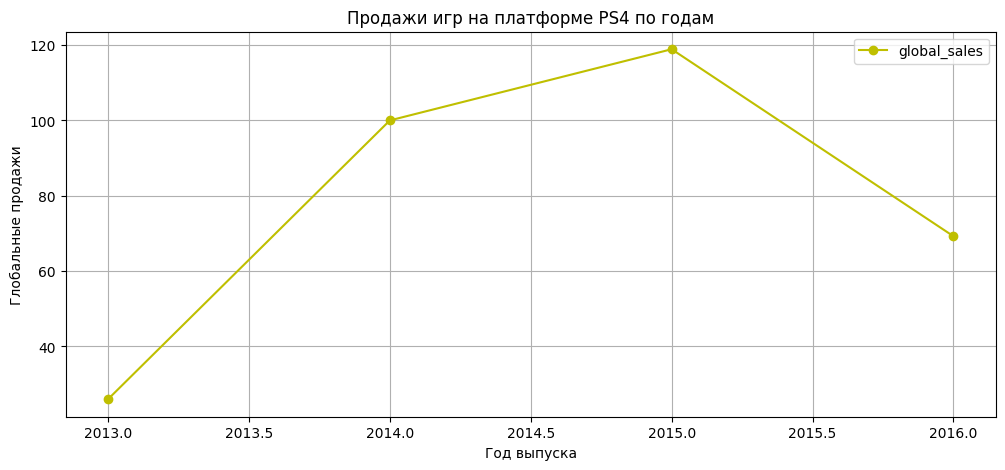

In [29]:
df.query('platform == "PS4"')\
.pivot_table(index='year_of_release', values='global_sales', aggfunc='sum')\
.plot(grid=True, 
      style='o-', 
      figsize=(12, 5), 
      color='y', 
      ylabel="Глобальные продажи",
      xlabel="Год выпуска",
      title='Продажи игр на платформе PS4 по годам')
plt.show()

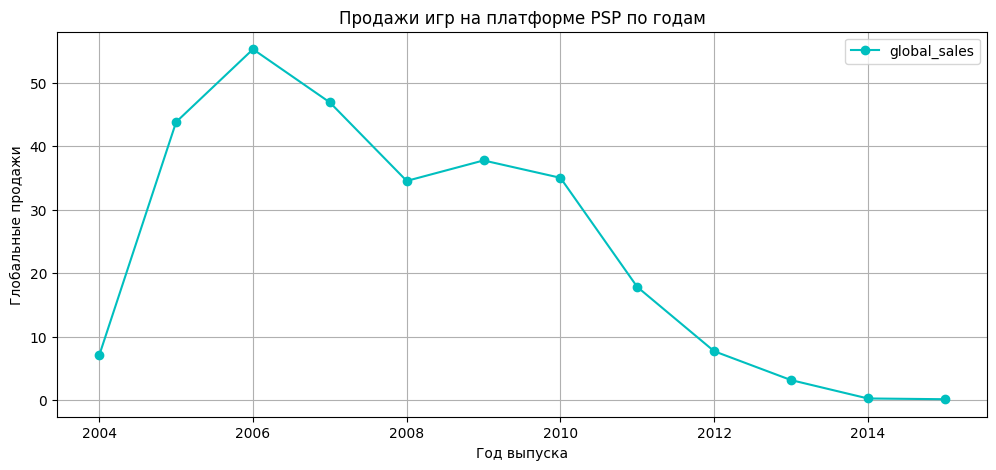

In [30]:
df.query('platform == "PSP"')\
.pivot_table(index='year_of_release', values='global_sales', aggfunc='sum')\
.plot(grid=True, 
      style='o-', 
      figsize=(12, 5), 
      color='c', 
      ylabel="Глобальные продажи", 
      xlabel="Год выпуска",
      title='Продажи игр на платформе PSP по годам')
plt.show()

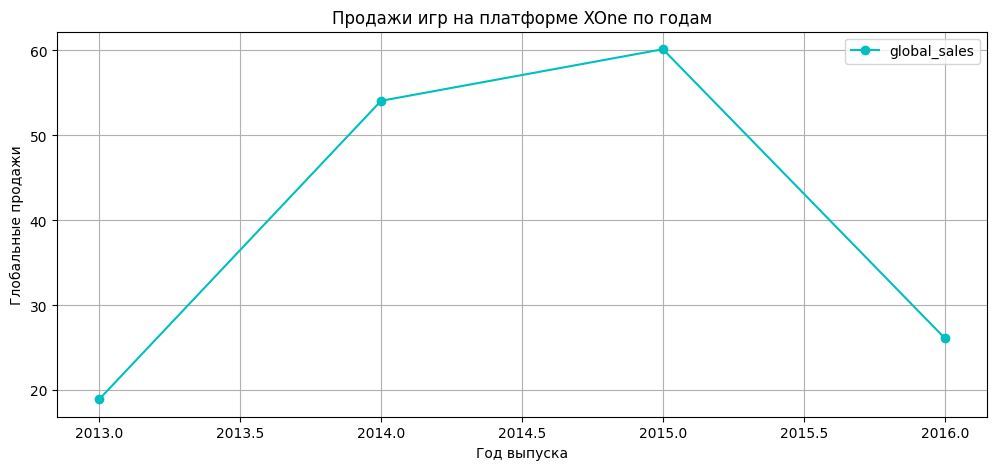

In [31]:
df.query('platform == "XOne"')\
.pivot_table(index='year_of_release', values='global_sales', aggfunc='sum')\
.plot(grid=True, 
      style='o-', 
      figsize=(12, 5), 
      color='c', 
      ylabel="Глобальные продажи",
      xlabel="Год выпуска",
      title='Продажи игр на платформе XOne по годам')
plt.show()

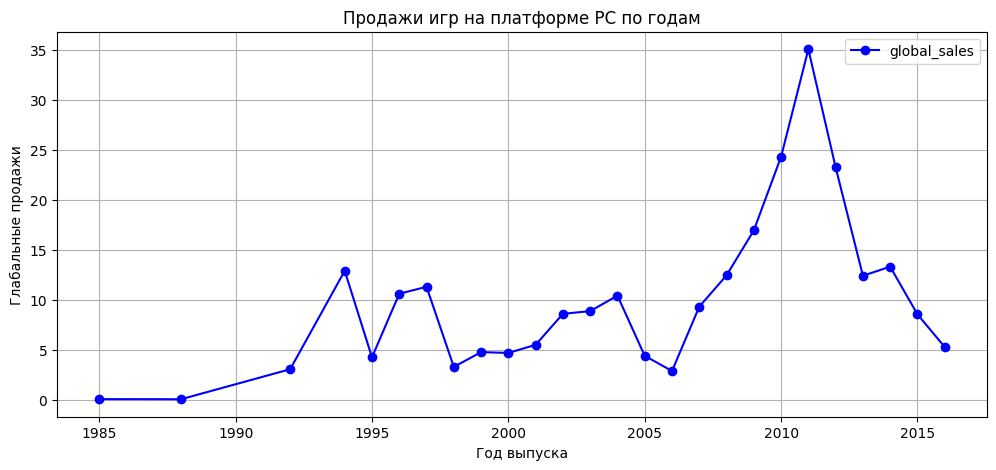

In [32]:
df.query('platform == "PC"')\
.pivot_table(index='year_of_release', values='global_sales', aggfunc='sum')\
.plot(grid=True, 
      style='o-', 
      figsize=(12, 5), 
      color='b', 
      ylabel="Глабальные продажи",
      xlabel="Год выпуска",
      title='Продажи игр на платформе PC по годам')
plt.show()

## Вывод по потенциально прибыльным платформам:

Видим, что в разные годы продажи для разных платформ отличаются, и понимаем также, что скошенность вниз происходит из-за того, что у нас неполные данные за 2016 год. Потому отсюда следует то, что нам потенциально прибыльны следующие платформы: PS4, PS3, XBOX 360 и XOne. 

Из-них наибольшую тенденцию имеют PS4 и XOne - поскольку это новые семейства предыдушего PS3 и X360

**Поставим вопрос: за какой характерный срок появляются новые и исчезают старые платформы?**

**Ответим:**

    Исчезают старые платформы характерно, к 2006 - 2010 гг. 

    А появление новых сопровождается в период с 2013. 
    
    Потому обозначим актуальность данных с 2013 года по 2016

****

In [33]:
df = df.query("year_of_release >= 2013")

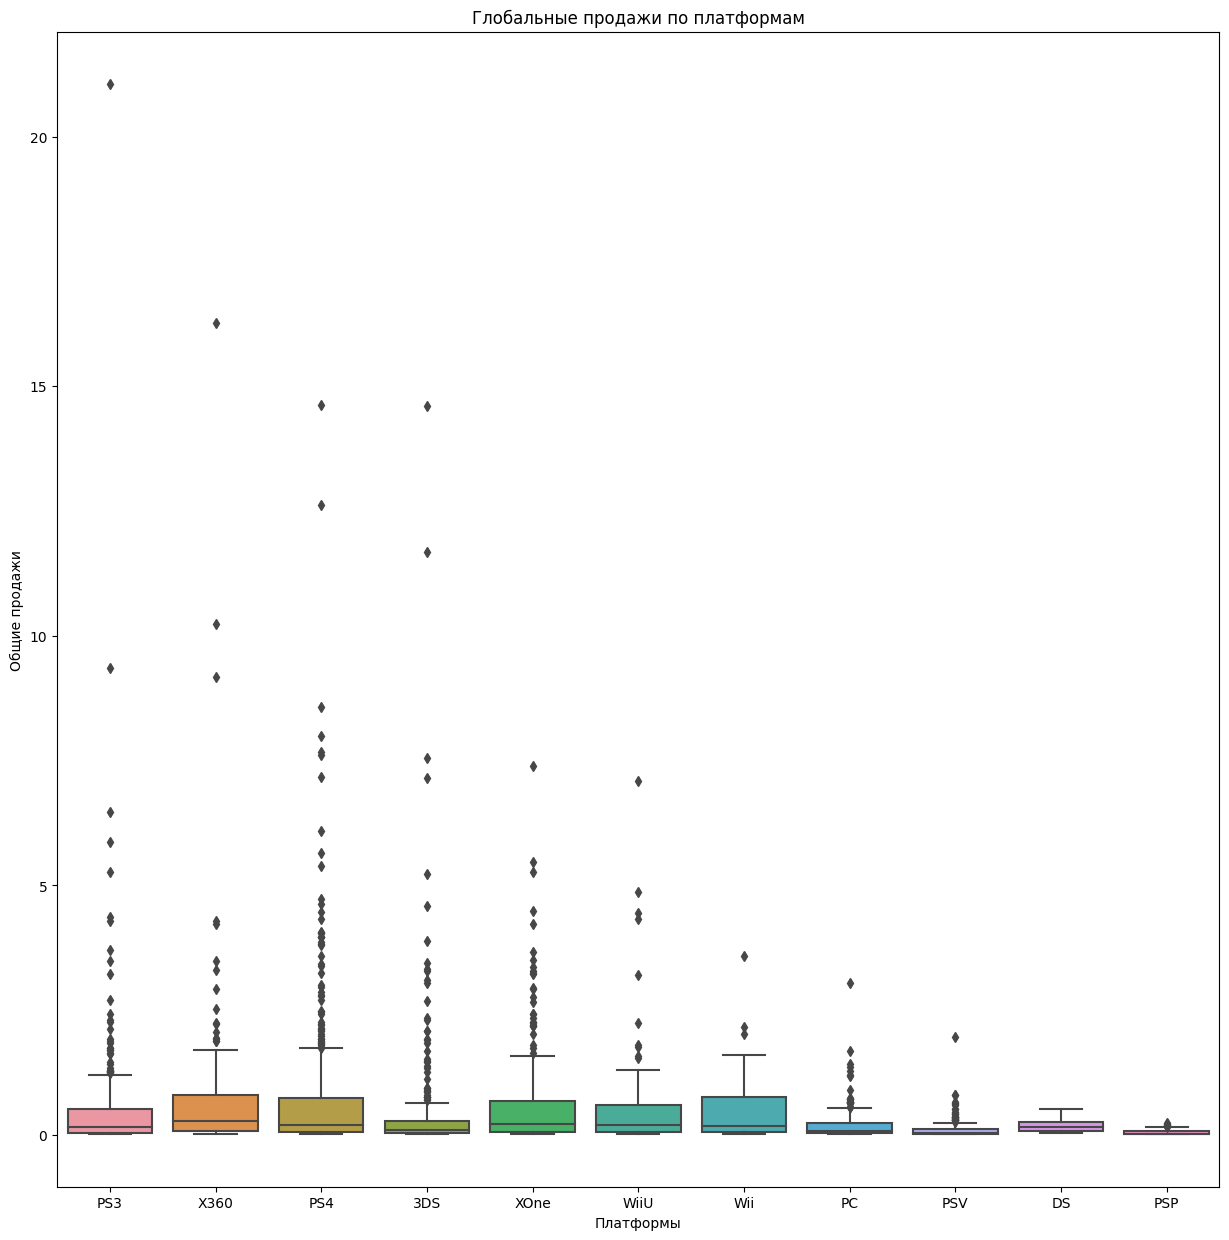

In [34]:
plt.figure(figsize=(15, 15))
(sns.boxplot(data = df, y = 'global_sales', x='platform')
    .set(title = 'Глобальные продажи по платформам',
         xlabel = 'Платформы',
         ylabel = 'Общие продажи'))
plt.show()

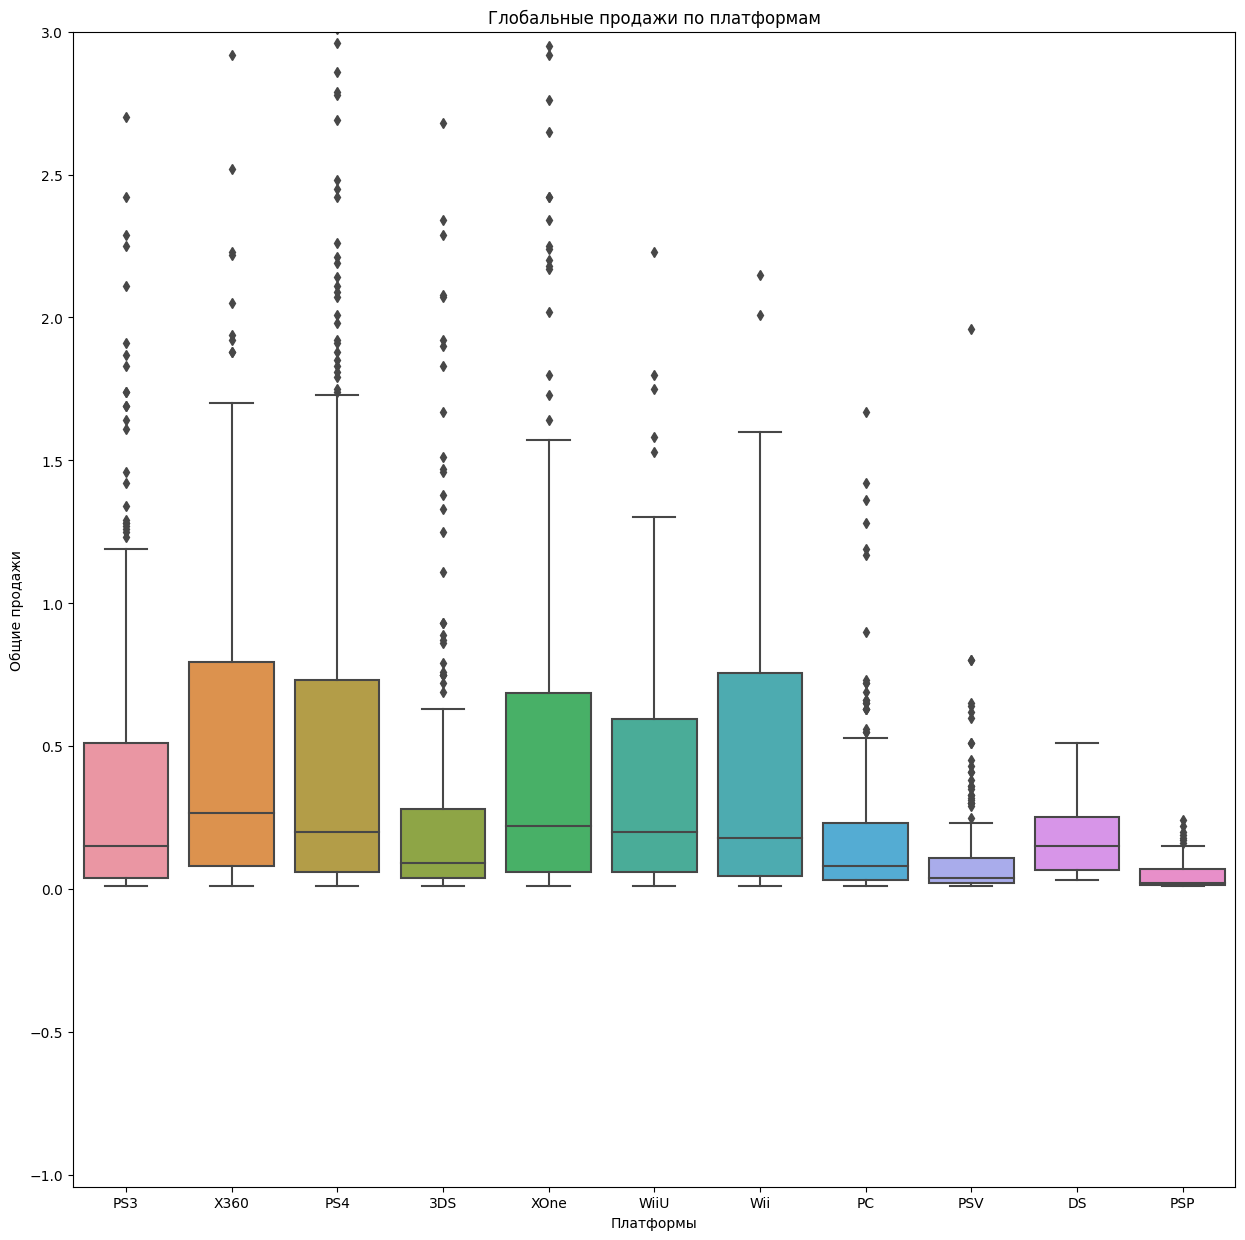

In [35]:
plt.figure(figsize=(15, 15))
(sns.boxplot(data = df, y = 'global_sales', x='platform')
    .set(title = 'Глобальные продажи по платформам',
         xlabel = 'Платформы',
         ylabel = 'Общие продажи'))
plt.ylim(top=3)
plt.show()

### Опишем результат по разбивке на платформы:

*Видно, что для разных платформ игр есть свои сильно отличающиеся глобальные продажи, то есть для новых платформ видна тенденция выбросов к наибольшему значению, чем среди их младшего поколения*

****

### Произведем проверку корреляции между признаками

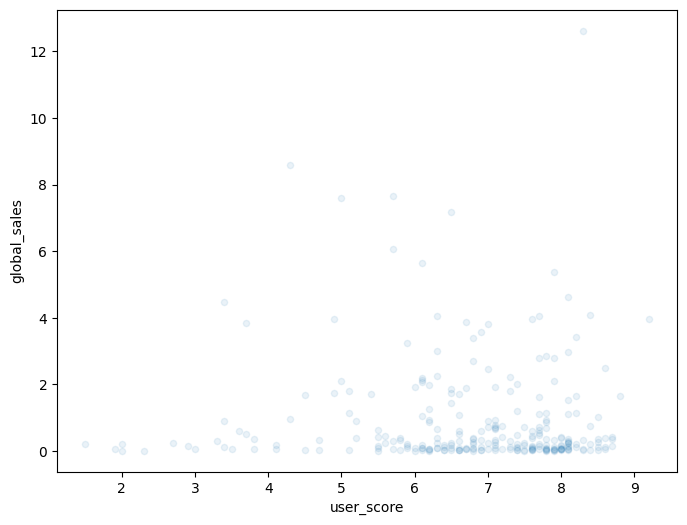

In [36]:
df_v1 = df.copy()
df_v1 = df_v1.loc[df_v1['user_score'] != -1]
df_v1.query('platform == "PS4"').plot(x='user_score', y='global_sales', kind='scatter', alpha=0.09, figsize=(8, 6))
plt.show()

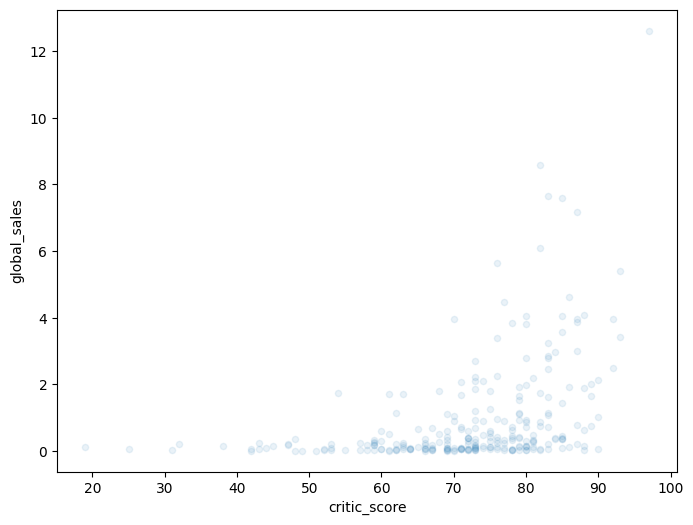

In [37]:
df.query('platform == "PS4"').plot(x='critic_score', y='global_sales', kind='scatter', alpha=0.09, figsize=(8, 6))
plt.show()

In [38]:
df_11 = df.query('platform == "PS4"')
print(df_11['user_score'].corr(df_11['global_sales']))

df_22 = df.query('platform == "PS4"')
print(df_22['critic_score'].corr(df_22['global_sales']))

0.11596149312860109
0.4065679020617816


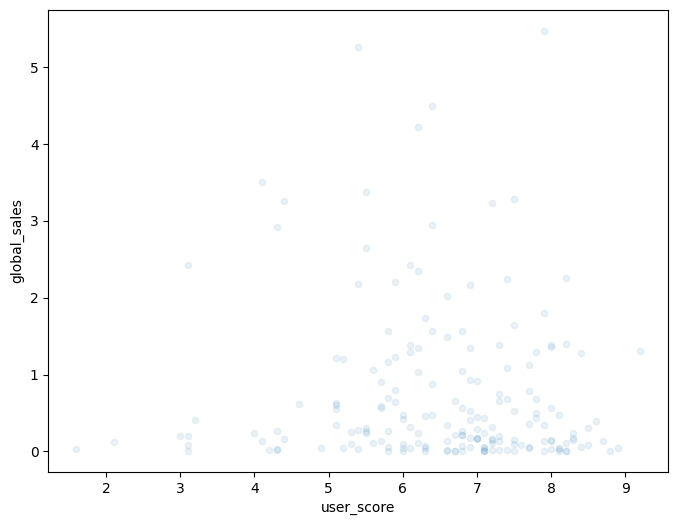

In [39]:
df_v2 = df.copy()
df_v2 = df_v2.loc[df_v2['user_score'] != -1]
df_v2.query('platform == "XOne"').plot(x='user_score', y='global_sales', kind='scatter', alpha=0.09, figsize=(8, 6))
plt.show()

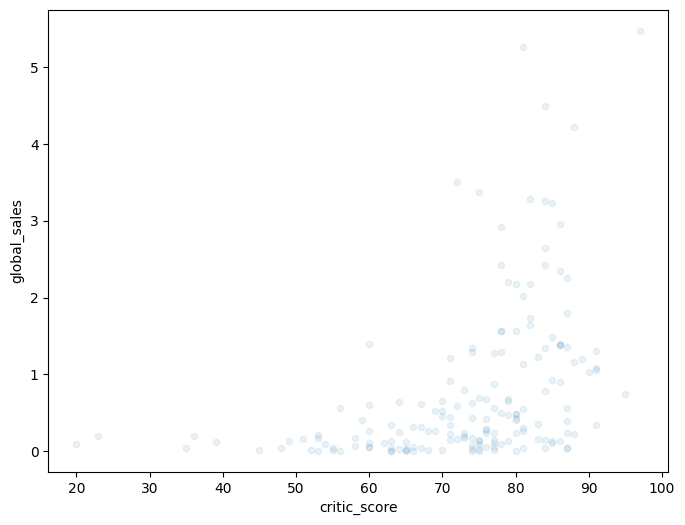

In [40]:
df.query('platform == "XOne"').plot(x='critic_score', y='global_sales', kind='scatter', alpha=0.09, figsize=(8, 6))
plt.show()

In [41]:
df_33 = df.query('platform == "XOne"')
print(df_33['user_score'].corr(df_33['global_sales']))

df_44 = df.query('platform == "XOne"')
print(df_44['critic_score'].corr(df_44['global_sales']))

0.12171152458232895
0.4169983280084017


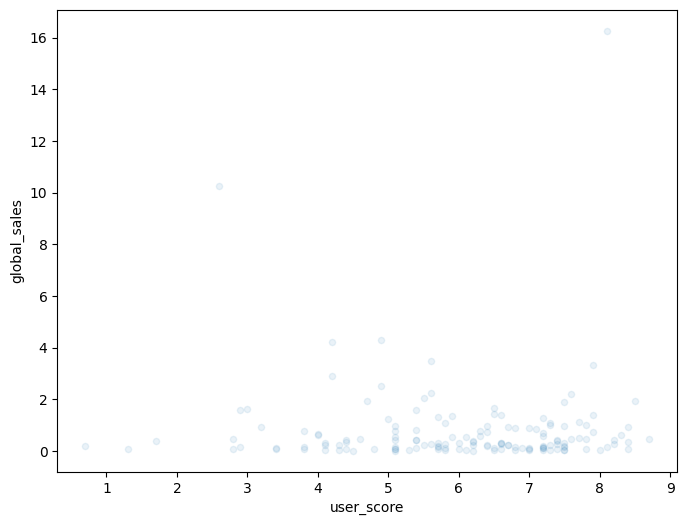

In [42]:
df_v3 = df.copy()
df_v3 = df_v3.loc[df_v3['user_score'] != -1]
df_v3.query('platform == "X360"').plot(x='user_score', y='global_sales', kind='scatter', alpha=0.09, figsize=(8, 6))
plt.show()

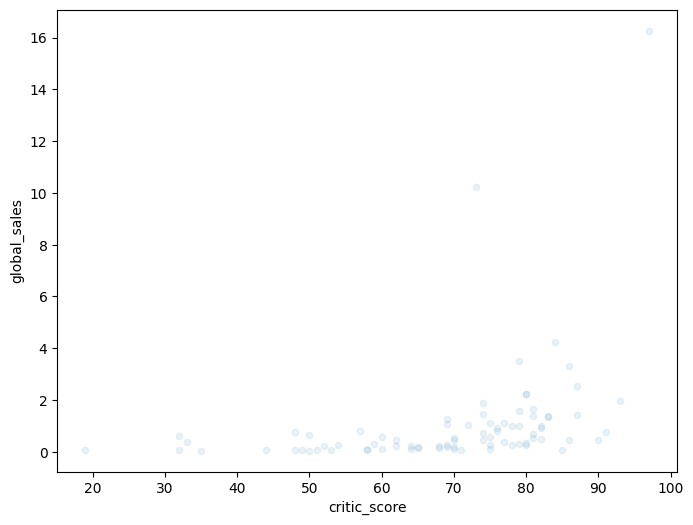

In [43]:
df.query('platform == "X360"').plot(x='critic_score', y='global_sales', kind='scatter', alpha=0.09, figsize=(8, 6))
plt.show()

In [44]:
df_55 = df.query('platform == "X360"')
print(df_55['user_score'].corr(df_55['global_sales']))

df_66 = df.query('platform == "X360"')
print(df_66['critic_score'].corr(df_66['global_sales']))

0.07186362137293788
0.3503445460228664


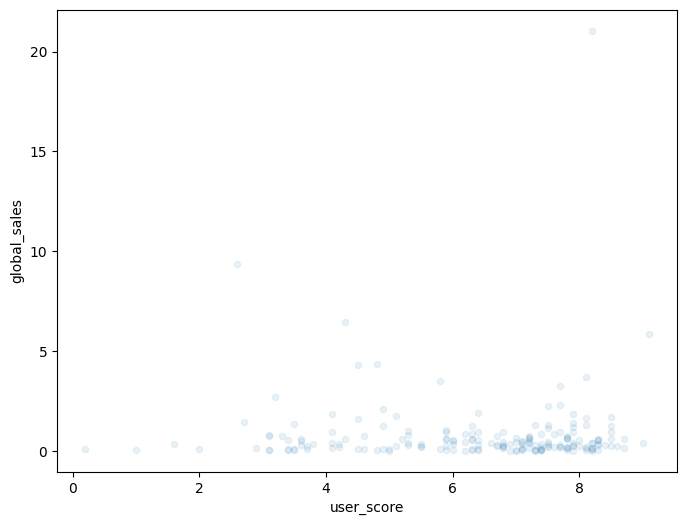

In [45]:
df_v4 = df.copy()
df_v4 = df_v4.loc[df_v4['user_score'] != -1]
df_v4.query('platform == "PS3"').plot(x='user_score', y='global_sales', kind='scatter', alpha=0.09, figsize=(8, 6))
plt.show()

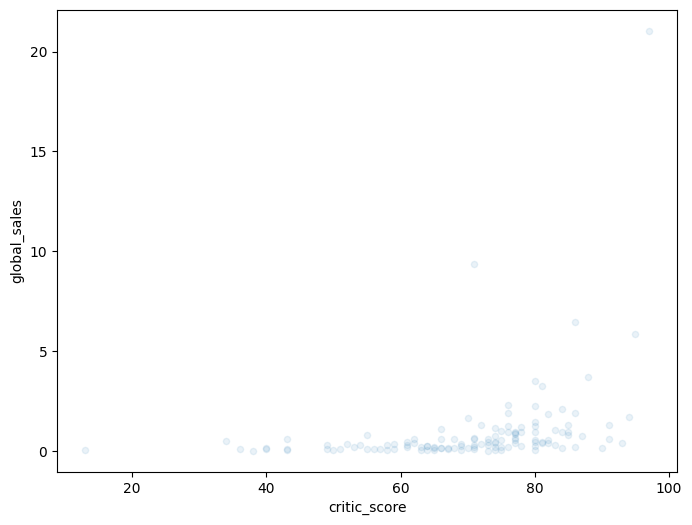

In [46]:
df.query('platform == "PS3"').plot(x='critic_score', y='global_sales', kind='scatter', alpha=0.09, figsize=(8, 6))
plt.show()

In [47]:
df_77 = df.query('platform == "PS3"')
print(df_77['user_score'].corr(df_77['global_sales']))

df_88 = df.query('platform == "PS3"')
print(df_88['critic_score'].corr(df_88['global_sales']))

0.205858768654504
0.3342853393371919


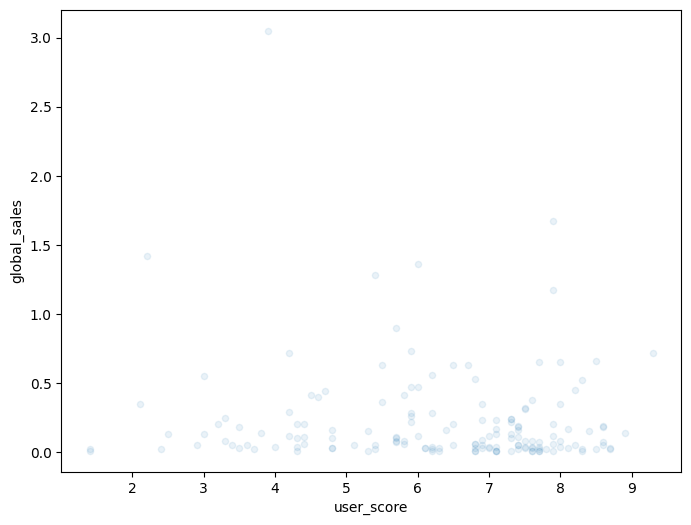

In [48]:
df_v5 = df.copy()
df_v5 = df_v5.loc[df_v5['user_score'] != -1]
df_v5.query('platform == "PC"').plot(x='user_score', y='global_sales', kind='scatter', alpha=0.09, figsize=(8, 6))
plt.show()

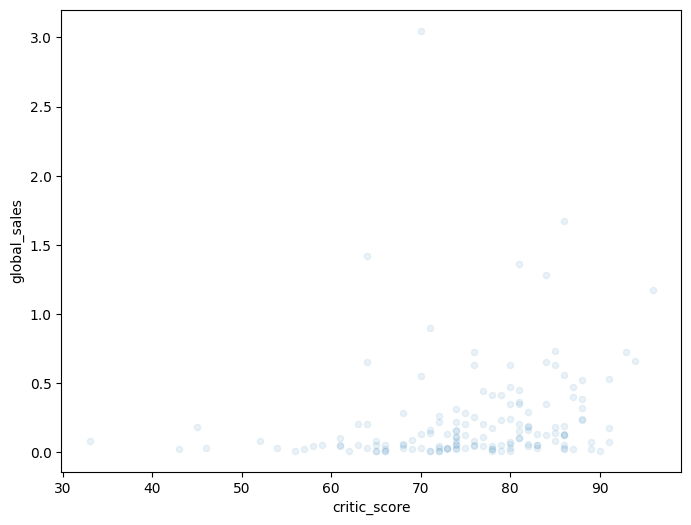

In [49]:
df.query('platform == "PC"').plot(x='critic_score', y='global_sales', kind='scatter', alpha=0.09, figsize=(8, 6))
plt.show()

In [50]:
df_99 = df.query('platform == "PC"')
print(df_99['user_score'].corr(df_99['global_sales']))

df_999 = df.query('platform == "PC"')
print(df_999['critic_score'].corr(df_999['global_sales']))

0.04949169498767856
0.1960302829436937


## Выводы по зависимости отзывов на продажи: 

1. Видим, что продажи игр имеет слабую зависимость от отзывов критиков
2. В то время как отзывы пользователей не сказываются на продажах, поскольку коэффициент корреляции в данном случае практически равен 0 

****

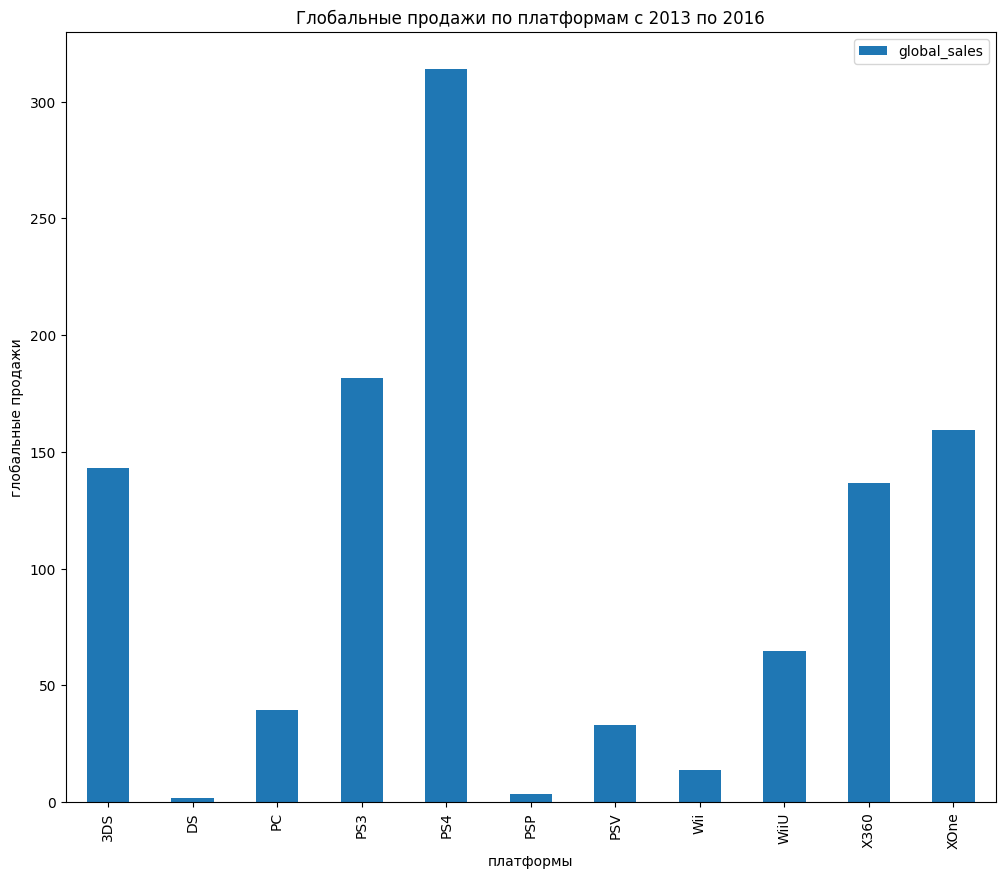

In [51]:
df.pivot_table(index='platform', values='global_sales', aggfunc='sum').plot.bar(figsize=(12, 10), ylabel='глобальные продажи', xlabel='платформы', title='Глобальные продажи по платформам с 2013 по 2016')
plt.show()

## Соотнесем выводы о продажах игр на других платформах:

*Наибольшие продажи имеются у платформы PS4, PS3, XOne, 3DS и X360 (в порядке убывания)*

*Наименьшие продажи имеются у платформы DS, PSP, Wii, PSV и PC (в порядке возрастания)*

****

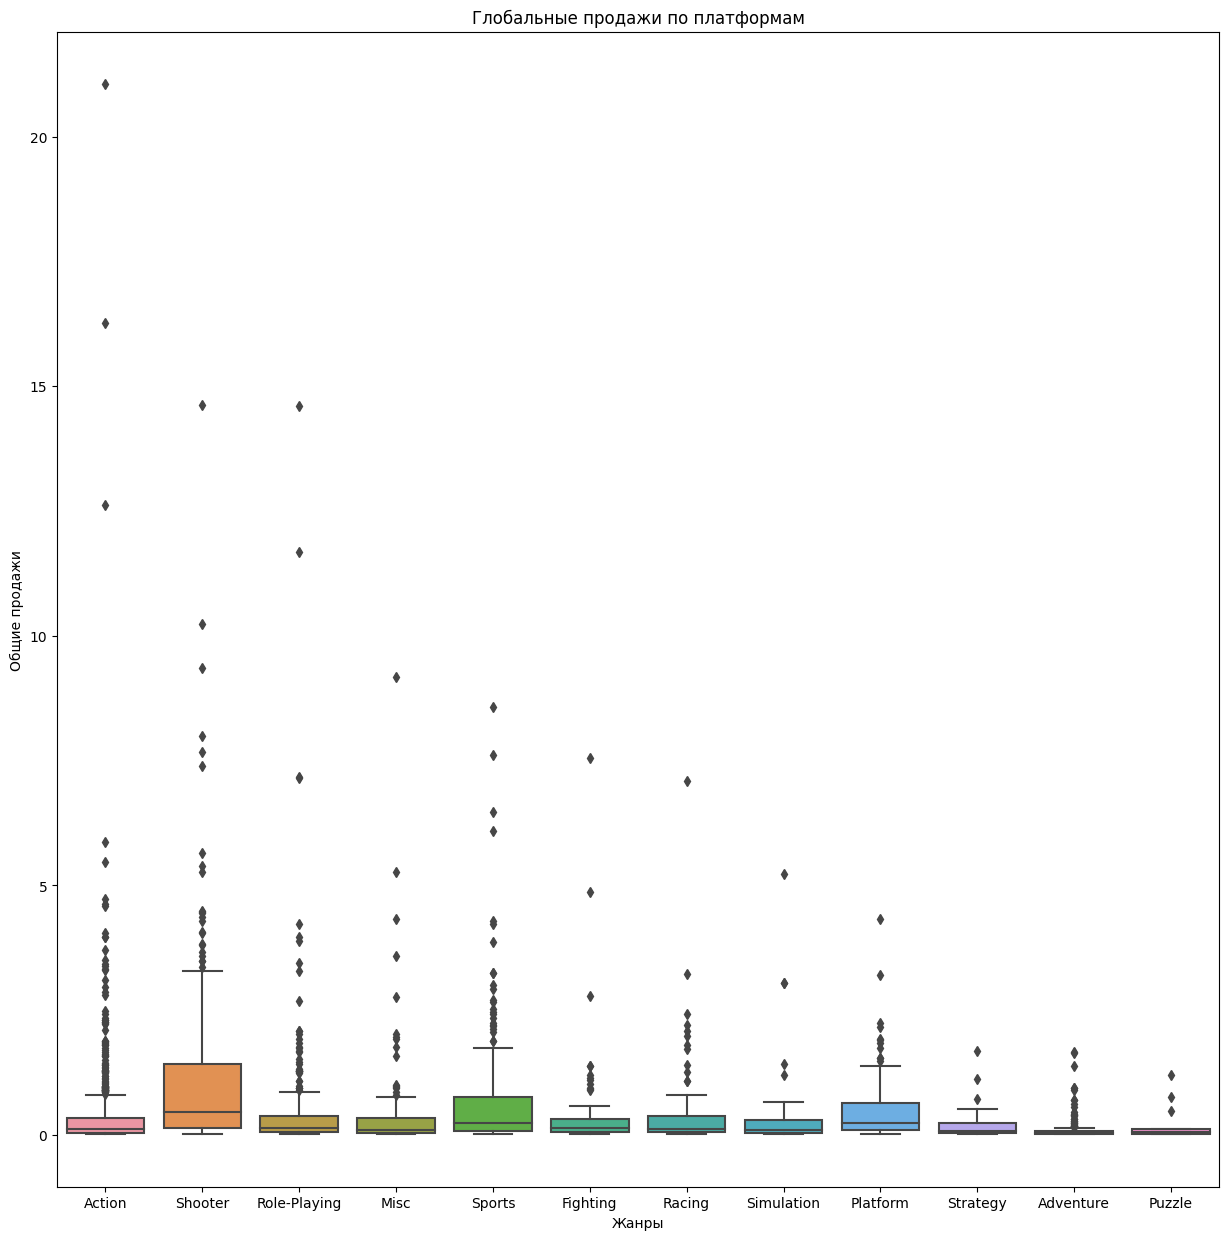

In [52]:
plt.figure(figsize=(15, 15))
(sns.boxplot(data = df, y = 'global_sales', x='genre')
    .set(title = 'Глобальные продажи по платформам',
         xlabel = 'Жанры',
         ylabel = 'Общие продажи'))
plt.show()

# Промежуточные выводы: 
1. Видим, что для жанра Action есть наибольшие значения выбросов чем среди остальных жанров;
2. Наблюдаем, что наименьшие значения квартилей у жанра Adventure; 
2. Также видим, что наибольшие первый и третий квартили у жанров: Action, Shooter, Sports и Platform - и это сведетельствует о том, что эти жанры устойчивы по продажам не зависимо от платформы;

# 4. Составьте портрет пользователя каждого региона

**Подсчет для пользователя региона NA (Северная Америка):**

In [53]:
print(df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5))

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64


In [54]:
print(df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5))

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64


In [55]:
print(df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5))

rating
M       165.21
-1       89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64


**Определение для пользователя региона NA (Северная Америка):**

    В лидерах платформы: PS4 и XOne
    В лидерах жанра: Action и Shooter
    В лидерах рейтинг: M

****

**Подсчет для пользователя региона EU (Европа):**

In [56]:
print(df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5))

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64


In [57]:
print(df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5))

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64


In [58]:
print(df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5))

rating
M       145.32
E        83.36
-1       78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64


**Определение для пользователя региона EU (Европа):**  

    В лидерах платформы: PS4 и PS3
    В лидерах жанра:  Action и Shooter 
    В лидерах рейтинг: M

****

**Подсчет для пользователя региона JP (Япония):**

In [59]:
print(df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5))

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


In [60]:
print(df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5))

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


In [61]:
print(df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5))

rating
-1      85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64


**Определение для пользователя региона JP (Япония):**

    В лидерах платформы: 3DS и PS3
    В лидерах жанра: Role-Playing и Action    
    В лидерах рейтинг: -1
   
**Примечание: -1 в данном контексте означает то, что рейтинг свой, не относящийся к системе оценок ESRB**

****

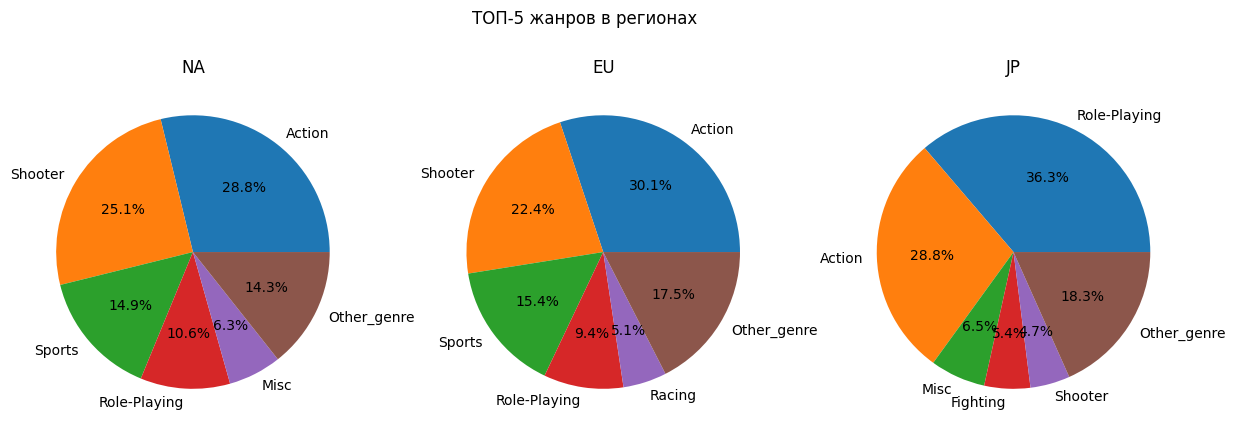

In [62]:
games_fresh = df.copy()
countries = games_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

****

## Заключение и выводы:

*Рейтинг ESRB влияет на продажи в отдельном регионе, поскольку рейтинг различен для отдельных регионов*

*Видны различные популярные плаиформы и жанры у регионов, - это обуславливается рядом фактором, таким как интерес потребителей в регионе и проводимый маркетинг, потому наблюдаем различия в продажах у жанров и платформ по регионам. И за счет ясности в каком регионе самый прибыльный жанр и какой регион потенционально способен принести для жанра наибольшие продажи - это служит практическим результатом для интернет-магазина.* 

****

# 5. Проверка гипотез

**Применим и рассчитаем Т-тест для средних двух независимых выборок в обоих гипотезах**

**Проверим нулевые гипотезы о том, что 2 независимые выборки имеют одинаковые (неодинаковые) средние значения. Этот тест предполагает, что выборки по умолчанию имеют одинаковые дисперсии.**

Проверка гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;

```
H_0: Пользовательские оценки (user_score) платформы "XOne" = Пользовательские оценки (user_score) платформы "PC"
H_a: Пользовательские оценки (user_score) платформы "XOne" ≠  Пользовательские оценки (user_score) платформы "PC"
alpha = 0.05
```

In [63]:
df1 = df.copy()
df1 = df1.loc[df1['user_score']!= -1]
sample_1 = df1.loc[df1['platform'] == 'XOne']['user_score']
sample_2 = df1.loc[df1['platform'] == 'PC']['user_score']

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [64]:
df1 = df.copy()
df1 = df1.loc[df1['user_score']!= -1]
print("Средние пользовательские рейтинги по платформе XOne:",df1.loc[df1['platform'] == 'XOne']['user_score'].mean())
print("Средние пользовательские рейтинги по платформе PC:",df1.loc[df1['platform'] == 'PC']['user_score'].mean())

Средние пользовательские рейтинги по платформе XOne: 6.521428571428572
Средние пользовательские рейтинги по платформе PC: 6.2696774193548395


****

Проверка гипотезы: cредние пользовательские рейтинги жанров Action и Sports разные;

```
H_0: Пользовательские оценки (user_score) жанра "Action" ≠ Пользовательские оценки (user_score) жанра "Sports"
H_a: Пользовательские оценки (user_score) жанра "Action" = Пользовательские оценки (user_score) жанра "Sports"
alpha = 0.05
```

In [65]:
df2 = df.copy()
df2 = df2.loc[df2['user_score']!= -1]
sample_11 = df2.loc[df2['genre'] == 'Action']['user_score']
sample_22 = df2.loc[df2['genre'] == 'Sports']['user_score']


results = st.ttest_ind(sample_11, sample_22, equal_var = False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704318e-20
Отвергаем нулевую гипотезу


In [66]:
df2 = df.copy()
df2 = df2.loc[df2['user_score']!= -1]
print("Средние пользовательские рейтинги по жанру Action:", df2.loc[df2['genre'] == 'Action']['user_score'].mean())
print("Средние пользовательские рейтинги по жанру Sports:", df2.loc[df2['genre'] == 'Sports']['user_score'].mean())

Средние пользовательские рейтинги по жанру Action: 6.837532133676092
Средние пользовательские рейтинги по жанру Sports: 5.238124999999999


# 6. Общий вывод

### Наша задача в данном иследовательском проекте состоялось в том, чтобы выполнить предобработку данных и изучить их, тем самым найдя  особенности и зависимости, которые существуют для интернет-магазина игр "Стримчик" и могут быть практически значимы для решений

*Первое, что следовало сделать - это оценить потери, которые мы имеем.*

* Нам известно о том, что данные были получены с помощью:
     * 1. Открытых источников исторических данных; 
     
*Привели названия столбцов к нижнему регистру для корретности и правильного оформления*
     
*Возможными причинами появления пропусков является ошибка системы при считывании данных.*

* Потому нам следовало заполнить или удалить пропуски следующими способами: 
    *  1. Произвести замену на 'NaN' для 'fda'; 
    *  2. Удалить пропуски; 
    *  3. Поставить заглушку;
   
*Замена производится по первому способу с помощью метода fillna*

* Столбцы, которые мы выбрали для соотвествующих замен: 
    * 1. 'year_of_release';
    * 2. 'user_score'; 

*Замена пропусков была необходима по той причине, что был указан не корретный тип данных, и эти столбцы нам важны для иследования, и потому пропуски было необходимо устранить, чтобы в дальнейшем присвоить им новый тип с помощью метода: `astype`*

*После мы проверили что есть, соотвественно, `дубликаты в наименованиях игр, их 5155`, которые были получены повторно возможно из-за выпуска игры на другой платформе*

*Также по ходу исследования мы добавили новые столбцы, такие как `global_sales` и `games_release`: первый служит для нас информацией об суммарных продажах игры по регионам, а второй нам нужен для того, чтобы подсчитать выпуск игр по годам, и так как названия игр у нас это строки, то '1' значение указывает на фактическое существование игры, и потому суммируется все коректно по годам*

*Посмотрели, сколько игр выпускалось в разные годы, как шло развитие всех выпусков и определили:* **важны данные не за все периоды**

                                      Топ жанров по продажам за 1980-2016:

|    Жанр игры    | Суммарные продажи (млн.)|
| --------------- | ----------------------- | 
|    Action       |         1744.17         |     
|    Sports       |         1331.27         |     
|    Shooter      |         1052.45         |    
|  Role-Playing   |          934.56         |
|    Platform     |          827.77         |    
|    Misc 	      |          802.51         |   
|    Racing	      |          728.67         |  
|    Fighting	  |          447.53         |   
|   Simulation 	  |          389.97         |   
|    Puzzle   	  |          242.57         |   

                                      Топ платформ по продажам за 1980-2016:

|    Платформа    | Суммарные продажи (млн.)|
| --------------- | ----------------------- | 
|       PS2       |         1255.77         |     
|      X360       |         971.42          |     
|    PS3          |         939.65        |    
|  Wii            |          907.51         |
|    DS           |          806.12        |    
|    PS 	      |          730.86         |   
|    GBA	      |          317.85         |  
|    PS4	      |          314.14         |   
|   PSP 	      |          294.05         |   
|    PC  	      |          259.52         |   


**Вывод по потенциально прибыльным платформам:** 

В разные годы продажи для разных платформ отличаются, и понимаем также, что скошенность вниз происходит из-за того, что у нас неполные данные за 2016 год. Потому отсюда следует то, что нам потенциально прибыльны следующие платформы: PS4, PS3, XBOX 360 и XOne. 

Из-них наибольшую тенденцию имеют PS4 и XOne - поскольку это новые семейства предыдушего PS3 и X360


**Поставим вопрос: за какой характерный срок появляются новые и исчезают старые платформы?**

**Ответим:**

    Исчезают старые платформы характерно, к 2006 - 2010 гг. 
    А появление новых сопровождается в период с 2013. Потому обозначим актуальность данных с 2013 года по 2016

**Соотнесем выводы о продажах игр на других платформах:**

    Наибольшие продажи имеются у платформы PS4, PS3, XOne, 3DS и X360 (в порядке убывания)*
    Наименьшие продажи имеются у платформы DS, PSP, Wii, PSV и PC (в порядке возрастания)*
    
**Опишем результат по разбивке на платформы:**

    Видно, что для разных жанров игр есть свои выбросы, которые в свою очередь, сведетельствуют о том, что присутствуют 
    опредленные игры для каждого жанра, чьи суммарные продажи значительно сильно превышают средние суммарные по жанру


**Выводы по зависимости отзывов на продажи:** видим, что продажи игр имеет слабую зависимость от отзывов критиков (коэфф. кореляции > 0.3), в то время как отзывы пользователей не сказываются на продажах, поскольку коэффициент корреляции в данном случае практически равен 0 


**Промежуточные выводы:**
1. **Самый прибыльный жанр**, не смотря на выпуск на различных платформах - **это Shooter**

    
**Определение для пользователя региона NA (Северная Америка):**



|  Платформы      | Суммарные продажи (млн.) |
| --------------- | ------------------------ | 
|      PS4        |             108.74       |     
|      XOne       |              93.12       |    

|      Жанры      | Суммарные продажи (млн.) |
| --------------- | ------------------------ | 
|       Action    |          126.05          |     
|      Shooter    |           109.74         |    



 
                                                      В лидерах рейтинг: M
                                                                                   

**Определение для пользователя региона EU (Европа):**  

|  Платформы      | Суммарные продажи (млн.) |
| --------------- | ------------------------ | 
|        PS4      |            141.09        |     
|        PS3      |             67.81        |    

|      Жанры      | Суммарные продажи (млн.) |
| --------------- | ------------------------ | 
|      Action     |           118.13         |     
|     Shooter     |           87.86          |     


                                                     В лидерах рейтинг: M
    
**Определение для пользователя региона JP (Япония):**

|  Платформы      | Суммарные продажи (млн.) |
| --------------- | ------------------------ | 
|      3DS        |          67.81           |     
|     PS3         |            23.35         |    

|      Жанры      | Суммарные продажи (млн.) |
| --------------- | ------------------------ | 
|    Role-playing |        51.04             |     
|  Action         |         40.49            |           



                                                        В лидерах рейтинг: -1
                                                        
**Примечание: -1 в данном контексте означает то, что рейтинг свой, не относящийся к системе оценок ESRB**
                                                        
**И за счет ясности - в каком регионе самый прибыльный жанр и какой регион потенционально способен принести для жанра наибольшие продажи - это служит практическим результатом для интернет-магазина.**


**Рейтинг ESRB влияет на продажи в отдельном регионе, поскольку рейтинг различен для отдельных регионов, ибо выпуск отдельных игр мог сопровождаться не из Америки, тем самым устанавливался для игры свой по стандарту региона возрастной рейтинг**

**В конце исследовательского проекта установили две гипотезы и проверили их с помощью t-теста:**

      1) Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые (H0); 
      В первом случае не получилось отвергнуть нулевую гипотезу; 
      2) Cредние пользовательские рейтинги жанров Action и Sports разные (H0);
      Во-втором отвергаем нулевую гипотезу
   